# Matematický software 

## Cv. 5 - Interpolace a aproximace

Prezentace: [POSEL](MS5_soubory/InterpAprox.pdf)

### Cognitive Apprenticeship

V tomto cvičení ...

In [75]:
!python3 -m pip install numpy

Python se nepovedlo naj�t. Spu


In [76]:
!python3 -m pip install matplotlib

Python se nepovedlo naj�t. Spu


In [77]:
import numpy as np
import matplotlib.pyplot as plt

#### Aproximovaná funkce

2.0
[ 0.   2.5  5.   7.5 10. ]


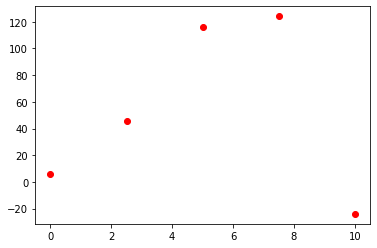

In [78]:
def f(x):
    return -x**3 + 10*x**2 - 3*x + 6

xstart = 0
xend = 10
nx = 5
dx = (xend - xstart)/nx
print(dx)
x = np.linspace(xstart, xend, nx)
print(x)

fx = f(x)

plt.plot(x, fx, "ro")

#### Lineární interpolace

<img src="MS5_soubory/linear.png" alt="Drawing" style="width: 600px;"/>

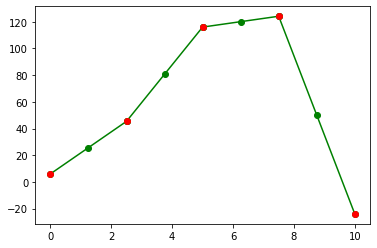

In [79]:
def linear(x, a, b):
    return f(a) + (f(b)-f(a))/(b-a)*(x-a)

phi = []
xphi = []

ninterpol = 3                                           # počet bodů uvnitř interpolační funkce (vč. krajních)
for i in range(len(x)-1):                               # len(x) počet bodů
    xinterpol = np.linspace(x[i], x[i+1], ninterpol)    # body, které mě zajímají uvnitř interpolační funkce; x[i] a x[i+1] krajní body
    g = linear(xinterpol, x[i], x[i+1])                 # hodnoty y bodů interpolační funkce
    xphi.extend(xinterpol)                              # rozšíření o nové body (x)
    phi.extend(g)                                       # rozšíření o nové body (y)

plt.plot(xphi, phi, "go-")                              # nové body
plt.plot(x, fx, "ro")                                   # původní body
plt.show()

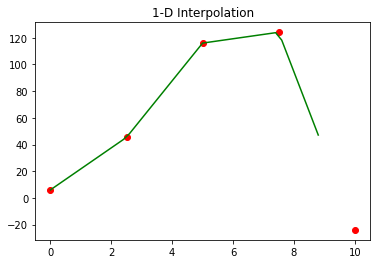

In [80]:
from scipy import interpolate

phi = interpolate.interp1d(x, fx)           # pole x a hodnot v nich
xnew = np.arange(0, 9, 0.2)                 # max. do 10.2
ynew = phi(xnew)                            # hodnoty v interpolovaných bodech
  
plt.title("1-D Interpolation")
plt.plot(x, fx, 'ro', xnew, ynew, 'g-')     # vyzkoušejte místo g- např. g+
plt.show()

#### Vandermondova matice

<img src="MS5_soubory/vandermontova.png" alt="Drawing" style="width: 350px;"/>

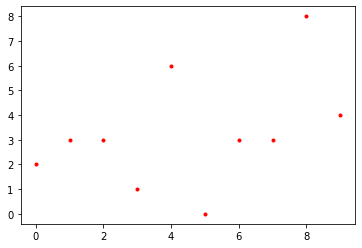

In [81]:
N = 10                              # 10 bodů
x = np.arange(0,N)                  # 0 až 9
y = np.random.randint(0,10,N)       # vektor náhodných hodnot
plt.plot(x, y, 'r.')
plt.show()

In [82]:
p = np.array([1,3,5])
P = np.vander(p)                        # ve sloupcích vždy mocniny původního vektoru
R = np.vander(p,increasing=True)        # rostoucí
print(p)
print(P)
print(R)

[1 3 5]
[[ 1  1  1]
 [ 9  3  1]
 [25  5  1]]
[[ 1  1  1]
 [ 1  3  9]
 [ 1  5 25]]


In [83]:
X = np.vander(x, increasing=True)        # velikost x z předchozího případu 10
print(x)
print(X[:5, :5])                         # prvních pět členů

[0 1 2 3 4 5 6 7 8 9]
[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


$P_n(x_i)=a_0+a_1x_i+a_2x_i^2+...+a_nx_i^n$

In [84]:
import scipy.linalg as la
a = la.solve(X, y)          # koeficienty interpolačního polynomu
print(a)

[ 2.00000000e+00 -2.28784921e+02  5.93894246e+02 -5.97369037e+02
  3.12335764e+02 -9.44983218e+01  1.71618056e+01 -1.84505622e+00
  1.08184524e-01 -2.66479277e-03]


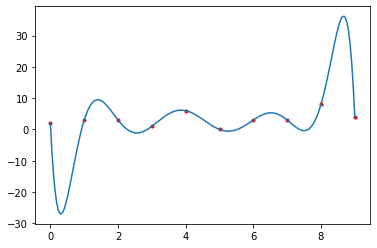

In [85]:
xs = np.linspace(0, N-1, 200)                   # nové body
ys = sum([a[k] * xs**k for k in range(0, N)])   # hodnoty v nich (součet mocnin)
plt.plot(x, y, 'r.', xs, ys)
plt.show()

#### Lagrangeova interpolace

<img src="MS5_soubory/lagrange.png" alt="Drawing" style="width: 600px;"/>

[0.   0.25 0.5  0.75 1.  ]
[1.   1.25 1.5  1.75 2.  ]
[2.   2.25 2.5  2.75 3.  ]
[3.   3.25 3.5  3.75 4.  ]
[4.   4.25 4.5  4.75 5.  ]
[5.   5.25 5.5  5.75 6.  ]
[6.   6.25 6.5  6.75 7.  ]
[7.   7.25 7.5  7.75 8.  ]
[8.   8.25 8.5  8.75 9.  ]


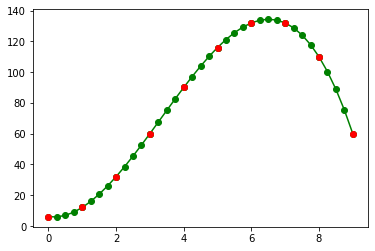

In [86]:
def f(x):           # funkce ke generování bodů
    return -x**3 + 10*x**2 - 3*x + 6

def lagrange(x, y, xi, n):
    
    Ln = 0          # inicializace
    for i in range(n):
        li = y[i]   # dílčí členy
        for j in range(n):
            if j != i:
                li = li * (xi - x[j]) / (x[i] - x[j])
        Ln += li    # přidat dílčí členy k výsledku
    return Ln

# definice daných bodů
x = np.linspace(0, 9, 10)
fx = f(x)

# interpolované body
xphi = []
phi = []

ninterpol = 5       # počet nových bodů

for i in range(len(x) - 1):
    xinterpol = np.linspace(x[i], x[i+1], ninterpol)
    print(xinterpol)
    g = lagrange(x, fx, xinterpol, ninterpol)
    xphi.extend(xinterpol)
    phi.extend(g)

plt.plot(xphi, phi, "go-")
plt.plot(x, fx, "ro")
plt.show()

cvičení

<img src="MS5_soubory/lagrangeukol.png" alt="Drawing" style="width: 600px;"/>

   3     2
1 x - 4 x + 3.053e-16 x + 10
[ 1.00000000e+00 -4.00000000e+00  3.05311332e-16  1.00000000e+01]


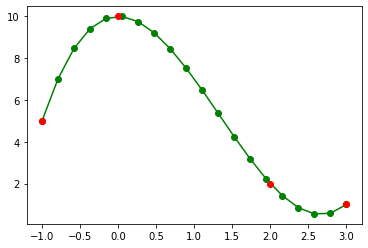

In [87]:
from scipy.interpolate import lagrange

x = np.array([-1, 0, 2, 3])
fx = np.array([5, 10, 2, 1])

phi = lagrange(x, fx)       # vrátí polynom (typ numpy.poly1d)
print(phi)                  # první řádek exponenty
print(phi.coef)             # koeficienty

n = 20
xphi = np.linspace(x[0], x[-1], n)
plt.plot(xphi, phi(xphi), "go-")
plt.plot(x, fx, "ro")
plt.show()

cvičení

<img src="MS5_soubory/lagrangeukol2.png" alt="Drawing" style="width: 600px;"/>

         3     2
-0.4167 x + 1 x + 0.4167 x + 1
[-0.41666667  1.          0.41666667  1.        ]


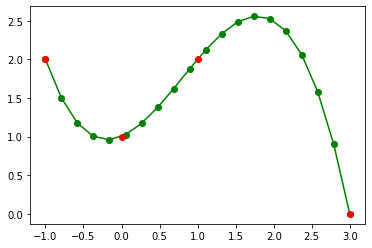

In [88]:
from scipy.interpolate import lagrange

x = np.array([-1, 0, 1, 3])
fx = np.array([2, 1, 2, 0])

phi = lagrange(x, fx)
print(phi)
print(phi.coef)

n = 20
xphi = np.linspace(x[0], x[-1], n)
plt.plot(xphi, phi(xphi), "go-")
plt.plot(x, fx, "ro")
plt.show()

#### Newtonova metoda

<img src="MS5_soubory/newton.png" alt="Drawing" style="width: 600px;"/>

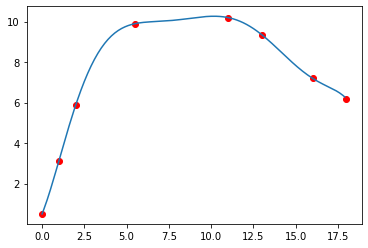

In [89]:
def divided_diff(x, y):    
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = np.array([0, 1, 2, 5.5, 11, 13, 16, 18])
y =  np.array([0.5, 3.134, 5.9, 9.9, 10.2, 9.35, 7.2, 6.2])

# get the divided difference coef
a_s = divided_diff(x, y)[0, :]

x_new = np.arange(x[0], x[-1], .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)


<img src="MS5_soubory/newtonspolu.png" alt="Drawing" style="width: 600px;"/>

[ 2.         -1.          1.         -0.83333333]


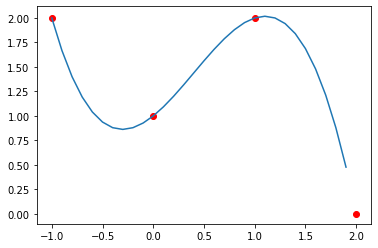

In [90]:
x = np.array([-1, 0, 1, 2])
y =  np.array([2, 1, 2, 0])

a_s = divided_diff(x, y)[0, :]
print(a_s)

x_new = np.arange(x[0], x[-1], .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)

<img src="MS5_soubory/newtonspolu2.png" alt="Drawing" style="width: 600px;"/>

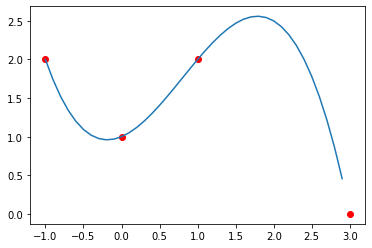

In [91]:
x = np.array([-1, 0, 1, 3])
y =  np.array([2, 1, 2, 0])

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(x[0], x[-1], .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)

cvičení

<img src="MS5_soubory/newtonukol1.png" alt="Drawing" style="width: 600px;"/>

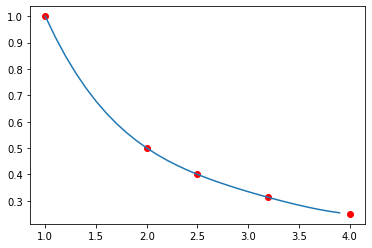

In [92]:
x = np.array([1, 2, 2.5, 3.2, 4])
y =  np.array(list(map(lambda x: 1/x, x)))

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(x[0], x[-1], .1)
y_new = newton_poly(a_s, x, x_new)

plt.plot(x, y, 'ro')
plt.plot(x_new, y_new)

<img src="MS5_soubory/newtonukol2.png" alt="Drawing" style="width: 600px;"/>

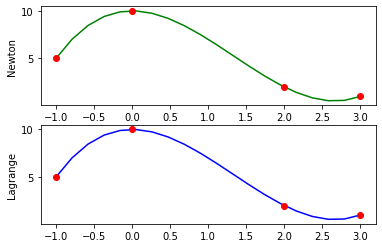

In [93]:
from scipy.interpolate import lagrange

x = np.array([-1, 0, 2, 3])
fx =  np.array([5, 10, 2, 1])

n = 20
xphi = np.linspace(x[0], x[-1], n)
phi_lagrange = lagrange(x, fx)

a_s = divided_diff(x, fx)[0, :]
phi_newton = newton_poly(a_s, x, xphi)

fig, (ax1, ax2) = plt.subplots(2, 1)
ax1.set_ylabel('Newton')
ax1.plot(xphi, phi_newton, 'g-')
ax1.plot(x, fx, "ro")
ax2.set_ylabel('Lagrange')
ax2.plot(xphi, phi_lagrange(xphi), 'b-')
ax2.plot(x, fx, "ro")
plt.show()

#### Aproximace metodou nejmenších čtverců

<img src="MS5_soubory/nejmc.png" alt="Drawing" style="width: 500px;"/>

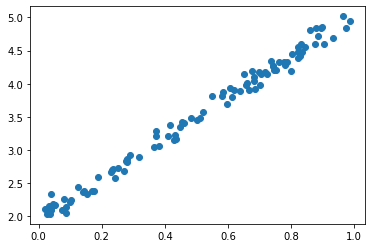

In [105]:
a0 = 2
a1 = 3
N = 100
x = np.random.rand(100)             # vektor 100 náh. čísel 0 až 1
noise = 0.1 * np.random.randn(100)  # normální rozdělení
y = a0 + a1*x + noise               # bez šumu by byly body na přímce
plt.scatter(x,y)

In [112]:
X = np.column_stack([np.ones(N),x])     # 2D pole
print(X.shape)
print(X[:5,:])                          # výpis prvních 5 řádků

(100, 2)
[[1.         0.03853671]
 [1.         0.44781344]
 [1.         0.22848109]
 [1.         0.7422809 ]
 [1.         0.23687999]]


In [118]:
print(X.T @ X)      # matice 2 x 2
print(X.T @ y)      # vektor
a = la.solve(X.T @ X, X.T @ y)
print("Koeficienty:", a)

[[100.          49.88091879]
 [ 49.88091879  33.57754579]]
[349.82096013 201.10713056]
Koeficienty: [1.9717401  3.06022731]


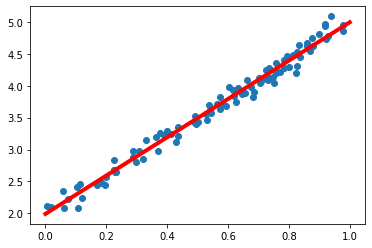

In [97]:
xs = np.linspace(0,1,10)
ys = a[0] + a[1]*xs                 # teoreticky 2 a 3
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y)
plt.show()

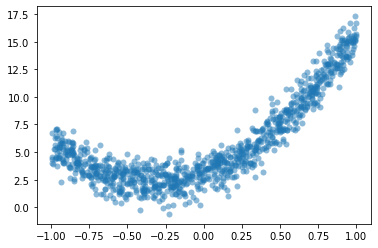

In [119]:
a0 = 3
a1 = 5
a2 = 8
N = 1000
x = 2*np.random.rand(N) - 1 # Random numbers in the interval (-1,1)
noise = np.random.randn(N)
y = a0 + a1*x + a2*x**2 + noise
plt.scatter(x,y,alpha=0.5,lw=0)
plt.show()

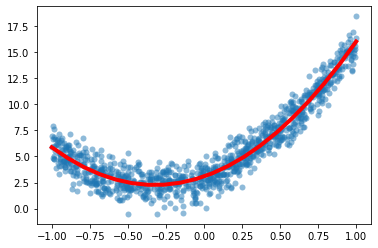

In [99]:
X = np.column_stack([np.ones(N),x,x**2])
a = la.solve((X.T @ X),X.T @ y)
xs = np.linspace(-1,1,20)
ys = a[0] + a[1]*xs + a[2]*xs**2
plt.plot(xs,ys,'r',linewidth=4)
plt.scatter(x,y,alpha=0.5,lw=0)
plt.show()

<img src="MS5_soubory/nejmccviko.png" alt="Drawing" style="width: 700px;"/>

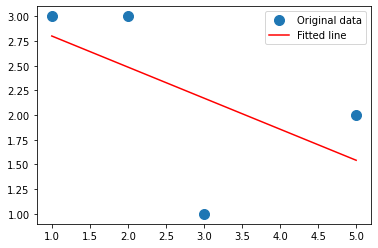

In [123]:
x = np.array([1, 2, 3, 5])
y = np.array([3, 3, 1, 2])
A = np.vstack([x, np.ones(len(x))]).T
#A = np.column_stack([x, np.ones(len(x))])
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

<img src="MS5_soubory/nejmcukol.png" alt="Drawing" style="width: 700px;"/>

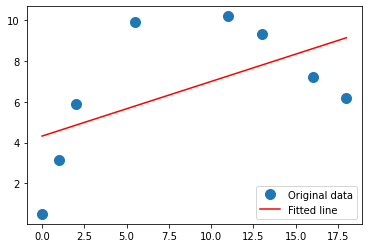

In [101]:
x = np.array([0, 1, 2, 5.5, 11, 13, 16, 18])
y =  np.array([0.5, 3.134, 5.9, 9.9, 10.2, 9.35, 7.2, 6.2])
A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()